## Building Predictive Models (part 2)
Supervised learning with classification and regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, make_scorer, recall_score, precision_score

In [3]:
# from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

### Decision tree

In [4]:
nonlin_df = pd.read_csv('Data/nonlinear_data.csv')
nonlin_df.head()

X = nonlin_df.loc[:,['x0', 'x1']].values
y = nonlin_df.loc[:,'y'].values

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


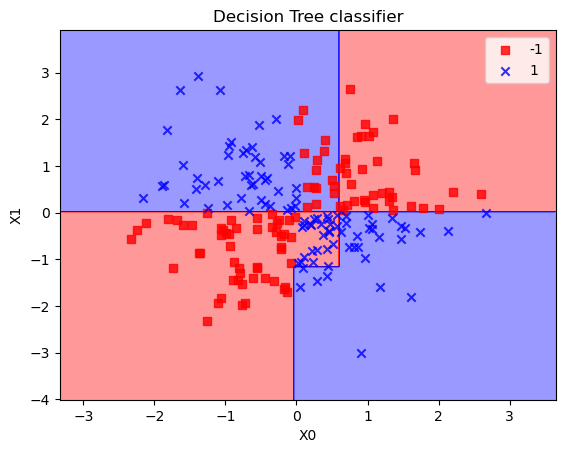

In [5]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)

tree.fit(X,y)

plot_decision_regions(X, y, classifier=tree)
plt.legend()
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Decision Tree classifier')

plt.show()

### Random Forest (RF)
an ensemble of decision trees. Ensemble of learning: combining weak learners to build a strong learner

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


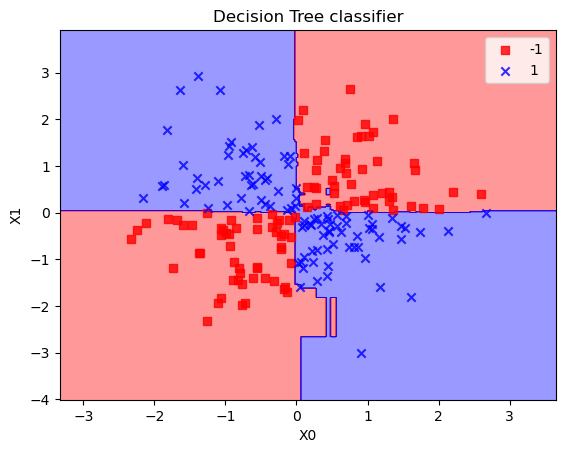

In [6]:
# from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', 
                                n_estimators=10, # number of trees in forest
                                n_jobs=2)

forest.fit(X, y)

plot_decision_regions(X, y, classifier=forest)
plt.legend()
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Decision Tree classifier')

plt.show()

### One-hot encoding

In [7]:
shoe_df = pd.DataFrame([['Green', 50.50],
                        ['Red', 93.50],
                        ['Blue', 35.30]])

shoe_df.columns = ['Color', 'Price']
shoe_df

,Color,Price
0,Green,50.5
1,Red,93.5
2,Blue,35.3


In [8]:
# from sklearn.preprocessing import LabelEncoder

X = shoe_df.values

color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 50.5],
       [2, 93.5],
       [0, 35.3]], dtype=object)

In [9]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('Color', OneHotEncoder(), [0])], remainder='passthrough')

ct.fit_transform(X)

array([[0.0, 1.0, 0.0, 50.5],
       [0.0, 0.0, 1.0, 93.5],
       [1.0, 0.0, 0.0, 35.3]], dtype=object)

### Feauture engineering (cancer data)

In [10]:
# from sklearn.ensemble import RandomForestClassifier

cancer_df = pd.read_csv('Data/cancer_data.csv')
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# from sklearn.preprocessing import LabelEncoder
# Tranforming class labels to 0 and 1 
X = cancer_df.iloc[:,2:].values
y = cancer_df.iloc[:,1].values

le = LabelEncoder()
y = le.fit_transform(y)

print('[M B] labels ->', le.transform(['M', 'B']))


[M B] labels -> [1 0]


In [12]:
forest = RandomForestClassifier(n_estimators=1000, # number of decicion trees
                                n_jobs = 5)

forest.fit(X, y)

feat_labels = cancer_df.columns[1:]
importances = forest.feature_importances_
indices = np.argsort(importances[::-1])

for f in range(5):
    print('%2d) %-*s %f' % (f + 1,
                            30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))



 1) fractal_dimension_se           0.110605
 2) radius_se                      0.004073
 3) concave points_se              0.004001
 4) radius_worst                   0.018482
 5) smoothness_se                  0.005171


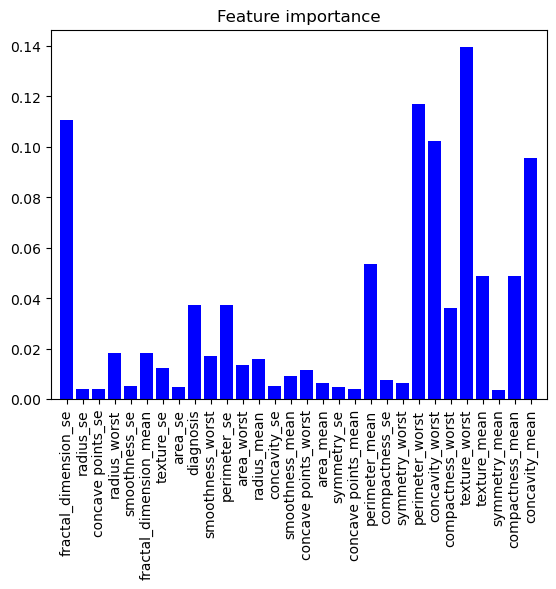

In [13]:
# Plotting the importance of the features

plt.title('Feature importance')
plt.bar(range(X.shape[1]),
        importances[indices], 
        color = 'blue',
        align = 'center')

plt.xticks(range(X.shape[1]),
           feat_labels[indices],
           rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Quiz

In [14]:
diabete_df = pd.read_csv('Data/diabetes_dataset.csv')
diabete_df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [15]:
X = diabete_df.iloc[:,:-2].values
y = diabete_df.iloc[:,-1].values

le = LabelEncoder()
y = le.fit_transform(y)

print('[tested_positive tested_negative] --> labels', le.transform(['tested_positive', 'tested_negative']))

[tested_positive tested_negative] --> labels [1 0]


In [16]:
# Build a RandomForest model and print the top 5 most important features
forest = RandomForestClassifier()
forest.fit(X,y)

feat_labels = diabete_df.columns[1:]
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(5):
    print('%2d) %-*s %f' % (f + 1,
                            30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) pres                           0.291387
 2) pedi                           0.193167
 3) age                            0.147090
 4) plas                           0.104125
 5) skin                           0.100782


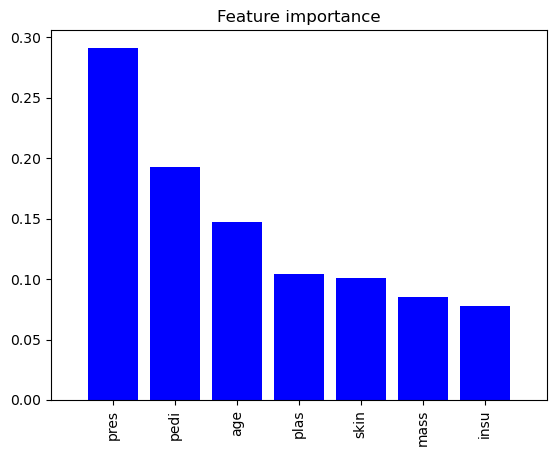

In [17]:
# Plotting the importance of the features

plt.title('Feature importance')
plt.bar(range(X.shape[1]),
        importances[indices], 
        color = 'blue',
        align = 'center')

plt.xticks(range(X.shape[1]),
           feat_labels[indices],
           rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

### Regression 
Supervised learning - predicting a continuous variable 

In [18]:
df_house = pd.read_csv('Data/df_house_ma.csv')
df_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Scatter plot matrix

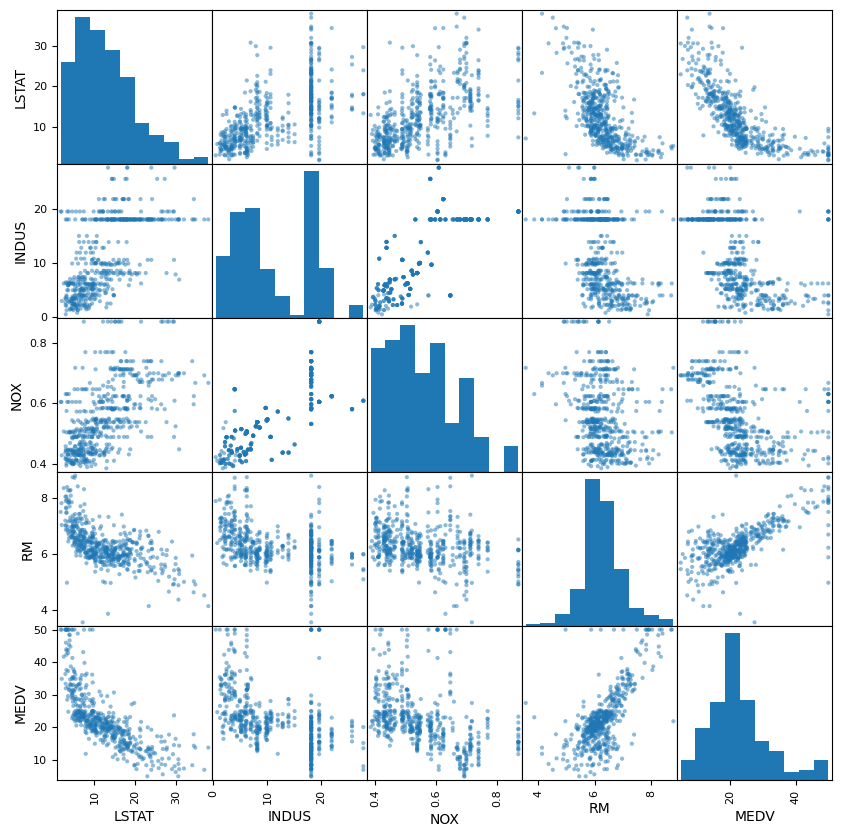

In [19]:
col_to_plot = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
pd.plotting.scatter_matrix(df_house.loc[:,col_to_plot],
                           figsize=(10,10))

plt.show()

#### Correlation

In [20]:
data = df_house[col_to_plot].values.T
cm = np.corrcoef(data)
cm = np.around(cm, decimals = 2)
print(cm)

[[ 1.    0.6   0.59 -0.61 -0.74]
 [ 0.6   1.    0.76 -0.39 -0.48]
 [ 0.59  0.76  1.   -0.3  -0.43]
 [-0.61 -0.39 -0.3   1.    0.7 ]
 [-0.74 -0.48 -0.43  0.7   1.  ]]


#### Heatmap

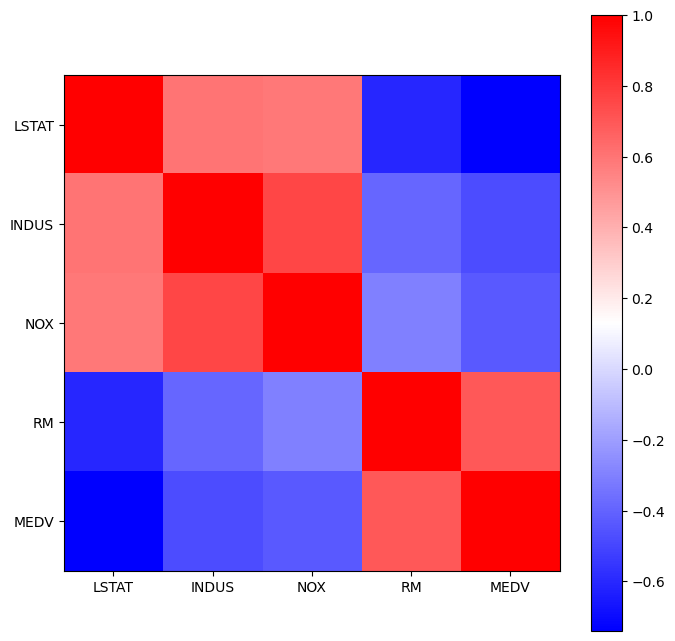

In [21]:
fig = plt.figure(figsize=(8,8))
ax = plt.imshow(cm, cmap='bwr')
plt.xticks(np.arange(5), col_to_plot)
plt.yticks(np.arange(5), col_to_plot)
cbar = fig.colorbar(ax)
plt.show()

#### Standardization

In [22]:
X = df_house[['RM']].values
y = df_house['MEDV'].values # Choosing the columns

# from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X) # Standardizing values 
y_std = sc_y.fit_transform(y[:,np.newaxis]) # Standardizing values


#### Linear Regression

Text(0.5, 1.0, 'Linear Regression')

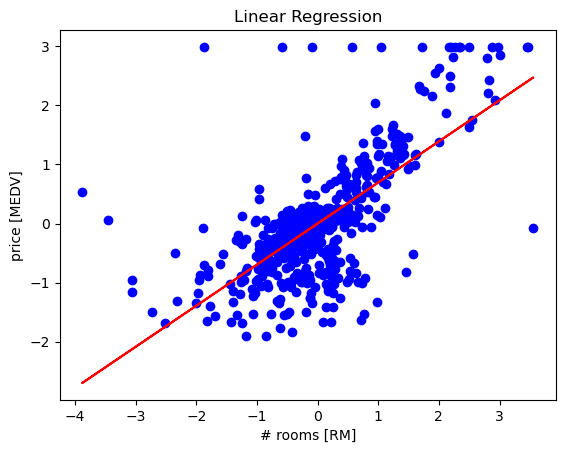

In [23]:
# from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_std, y_std)
y_pred = slr.predict(X_std)

plt.scatter(X_std, y_std, c ='blue')
plt.plot(X_std, y_pred, c='red')
plt.xlabel('# rooms [RM]')
plt.ylabel('price [MEDV]')
plt.title('Linear Regression')

In [24]:
w0 = np.around(slr.intercept_[0], decimals=2)
w1 = np.around(slr.coef_[0][0], decimals=2)
print(f'y = {w0} + {w1} * X')

y = -0.0 + 0.7 * X


#### Quiz
The company asks us to analyze the dataset and:
* compute the correlation between features(correlation analysis)
* build a linear regression model
* predict the revenue of these upcoming films in [$]

In [25]:
movie_df = pd.read_csv('Data/movie-data-clean.csv')
movie_df.head()

,title,budget,vote_count,revenue
0,Toy Story,30000000.0,5415.0,373554033.0
1,Jumanji,65000000.0,2413.0,262797249.0
2,Waiting to Exhale,16000000.0,34.0,81452156.0
3,Heat,60000000.0,1886.0,187436818.0
4,Sabrina,58000000.0,141.0,0.0


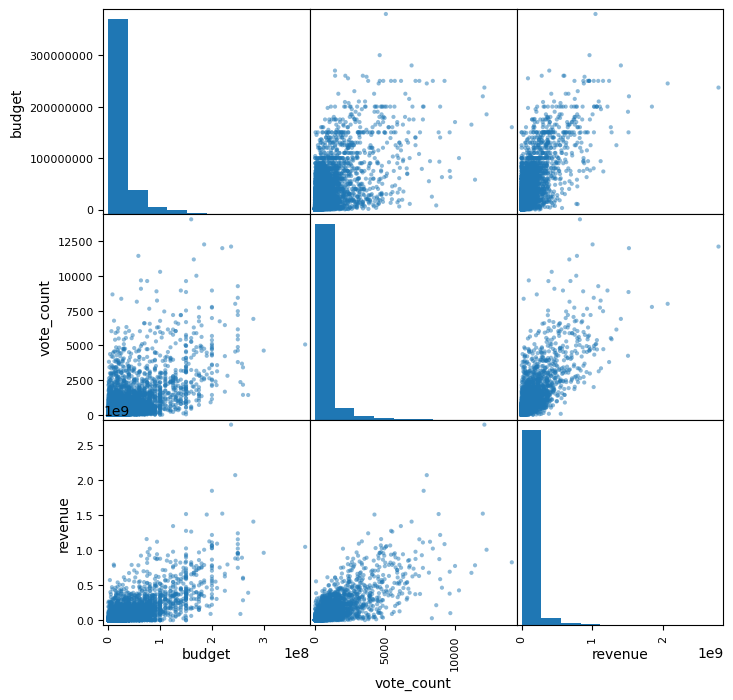

In [26]:
columns_ = 'budget', 'vote_count', 'revenue'
pd.plotting.scatter_matrix(movie_df.loc[:,columns_],
                           figsize=(8,8))

plt.show()

In [27]:
# data = movie_df[columns_].values.T
# cm = np.corrcoef(data)
# cm = np.around(cm, decimals=2)
# print(cm)


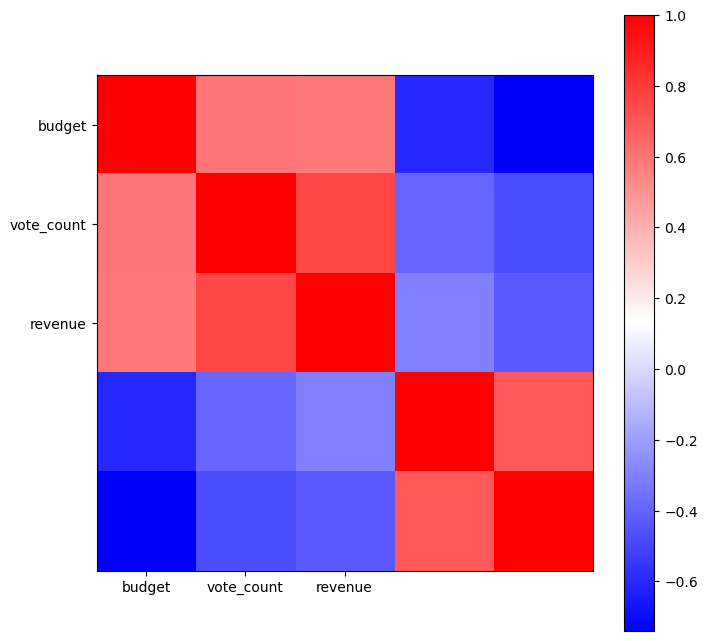

In [28]:
fig = plt.figure(figsize=(8,8))
ax = plt.imshow(cm,cmap='bwr')
len_ = len(columns_)
plt.xticks(np.arange(len_), columns_)
plt.yticks(np.arange(len_), columns_)
cbar = fig.colorbar(ax)
plt.show()

In [29]:
## Se more in slides

### Evaluation 

In [30]:
moon_df = pd.read_csv('Data/moon_data.csv')
moon_df.head()

,x0,x1,y
0,0.362034,0.901495,-1
1,-0.192355,0.468432,1
2,0.137820,0.104412,1
3,1.745660,-0.120071,1
4,1.927158,-0.238542,1


In [31]:
X = moon_df.loc[:,['x0','x1']].values
y = moon_df.loc[:, 'y'].values

#### VIzualizing the data

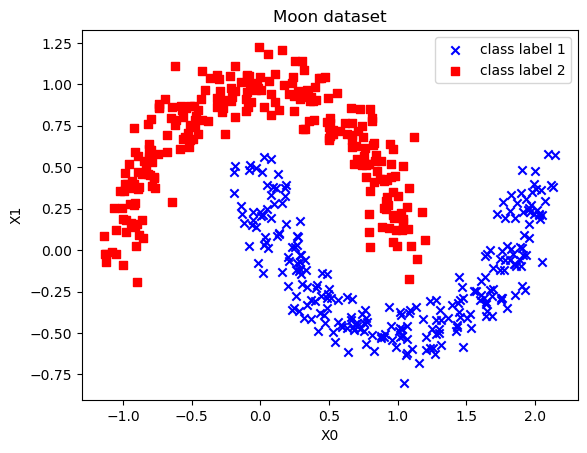

In [32]:
plt.scatter(X[y==1,0],
            X[y==1,1],
            c= 'b', marker = 'x',
            label = 'class label 1')
plt.scatter(X[y==-1,0],
            X[y==-1,1],
            c= 'r', marker = 's',
            label = 'class label 2')

plt.legend()
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Moon dataset')

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


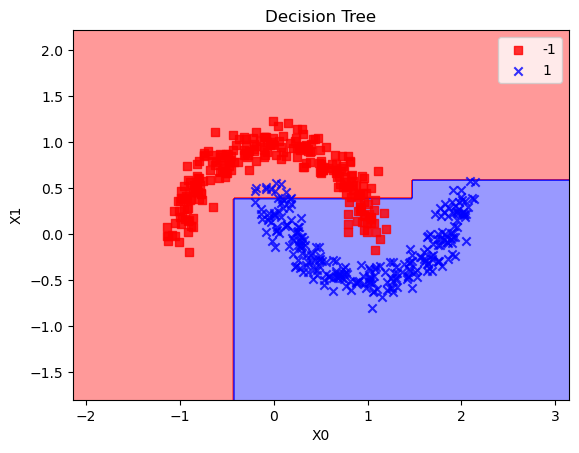

In [33]:
### Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

tree.fit(X,y)
plot_decision_regions(X, y, classifier=tree)
plt.legend()
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Decision Tree')

plt.show()

### Random forest

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


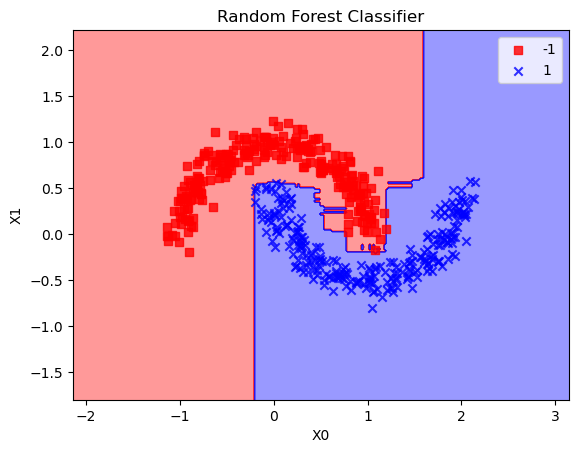

In [34]:
# from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=2)

forest.fit(X, y)

plot_decision_regions(X, y, classifier=forest)
plt.legend()
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Random Forest Classifier')

plt.show()

#### Evaluating Random Forest Classifier

In [35]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

forest = RandomForestClassifier(n_estimators=10000, n_jobs=5)

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [36]:
# from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=forest, 
                         X = X_train, 
                         y = y_train,
                         cv = 5, 
                         n_jobs= 1)

In [38]:
# from sklearn.metrics import f1_score, make_scorer, recall_score, precision_score

In [39]:
print('Accuracy: %.3f' % forest.score(X_test, y_test))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1: 1.000


In [41]:
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.975 1.    1.    1.    1.   ]
CV accuracy: 0.995 +/- 0.010
